In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('/Users/sa22/Documents/code/Music_recommedation_algorithm/data/processed/transformed_dataset.csv')

df.head()

,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
0,95,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,1.0
1,51,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,1.0
2,24,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,1.0
3,54,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,1.0
4,48,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,1.0


# K-Means Clustering without scaling

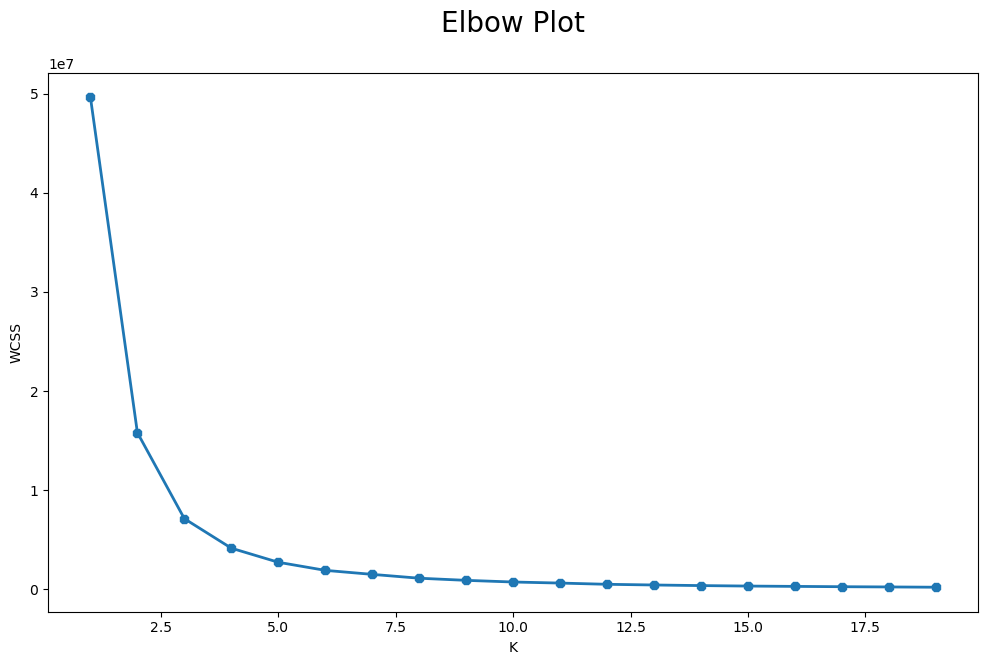

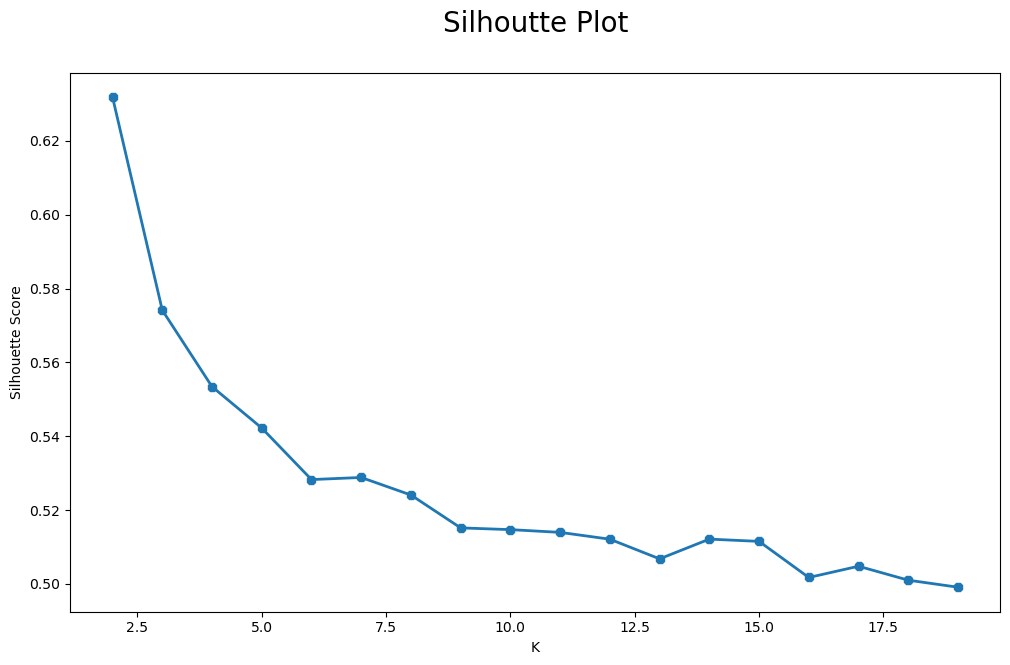

In [3]:
X1 = df.loc[:, ['len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'sadness', 'feelings', 'age']].values

wcss = []

for k in range(1, 20):
    # TODO: create a Kmeans object initialized with `k` clusters and `init` parameter of `k-means++`
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 20), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

# create a plot of silhoutte score

silhouette = []
for k in range(2, 20):
    # TODO: create a Kmeans object initialized with `k` clusters and `init` parameter of `k-means++`
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    predictions = kmeans.fit_predict(X1)
    silhouette.append(metrics.silhouette_score(X1, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 20), silhouette, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

Based on this elbow and silhoutte plot, I'm gonna go with k = 4.

In [4]:
kmeans =  KMeans(n_clusters= 4, init = "k-means++" ,n_init= 20,  random_state= 42)

# Fit the KMeans model to the dataset X1
kmeans.fit(X1)

KMeans(n_clusters=4, n_init=20, random_state=42)

In [5]:
labels = kmeans.fit_predict(X1)
labels

array([0, 1, 1, ..., 3, 3, 3], dtype=int32)

In [6]:
kmeans.cluster_centers_

array([[1.05784855e+02, 2.04270215e-02, 1.47056391e-01, 1.04572781e-01,
        5.56767163e-02, 2.15281611e-02, 1.81005471e-02, 3.10296776e-02,
        7.16415553e-02, 1.24452357e-01, 5.29636816e-02, 5.93765343e-02,
        4.63353649e-02, 2.53211300e-02, 1.04296113e-01, 3.11464827e-02,
        3.44542016e-01],
       [3.53326558e+01, 2.15363385e-02, 9.54333285e-02, 1.40876671e-01,
        6.13075408e-02, 1.36314603e-02, 1.63487401e-02, 7.16464788e-02,
        8.23656639e-02, 4.25134088e-02, 7.05007061e-02, 3.20482314e-02,
        5.19630790e-02, 2.39092427e-02, 1.58888631e-01, 3.29265759e-02,
        5.03005918e-01],
       [1.65540353e+02, 1.78918404e-02, 1.12138592e-01, 7.21925890e-02,
        3.68788963e-02, 2.50139369e-02, 1.63031157e-02, 1.73753154e-02,
        6.31760791e-02, 3.22147609e-01, 3.50270579e-02, 6.75758599e-02,
        3.48090305e-02, 2.29507973e-02, 4.41194345e-02, 2.46066513e-02,
        3.03374734e-01],
       [6.74374872e+01, 2.19893577e-02, 1.28642073e-01, 1.234

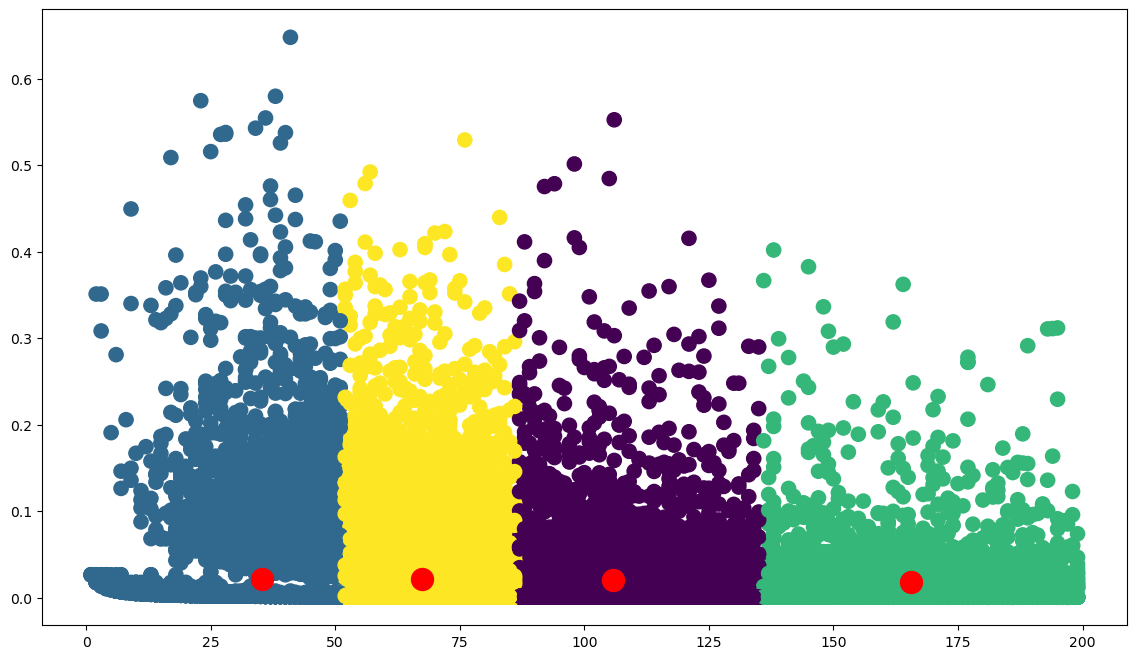

In [7]:
# view 2D clusters

plt.figure(figsize = (14, 8))

plt.scatter(X1[:, 0], X1[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250)
plt.show()

This chart shows some categories but the clusters make this a mess to look at.

# K-Means Clustering with scaling

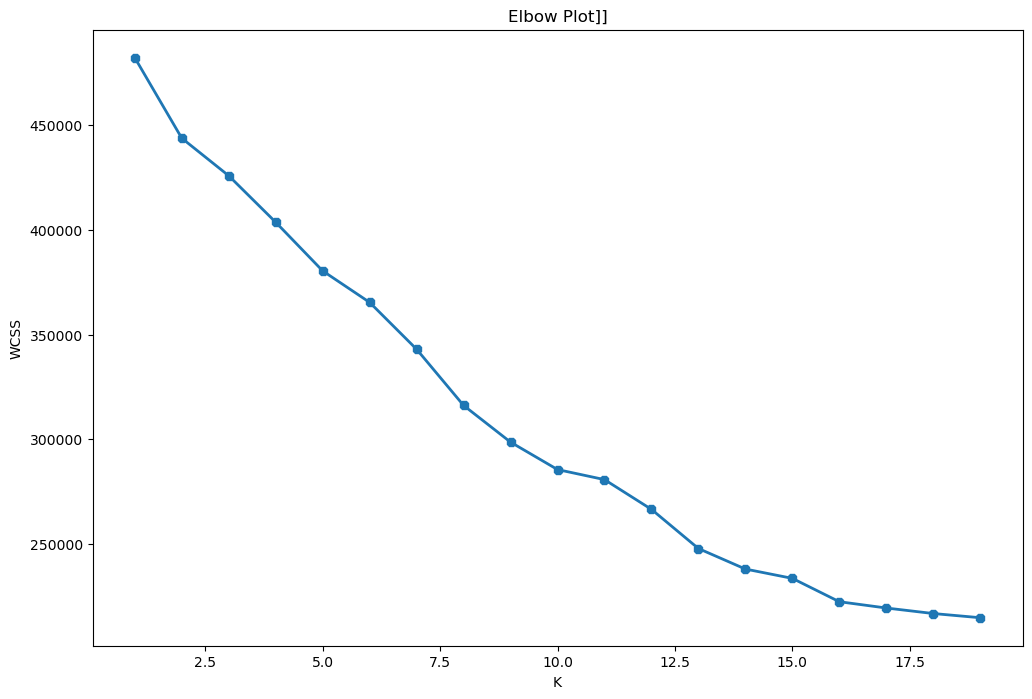

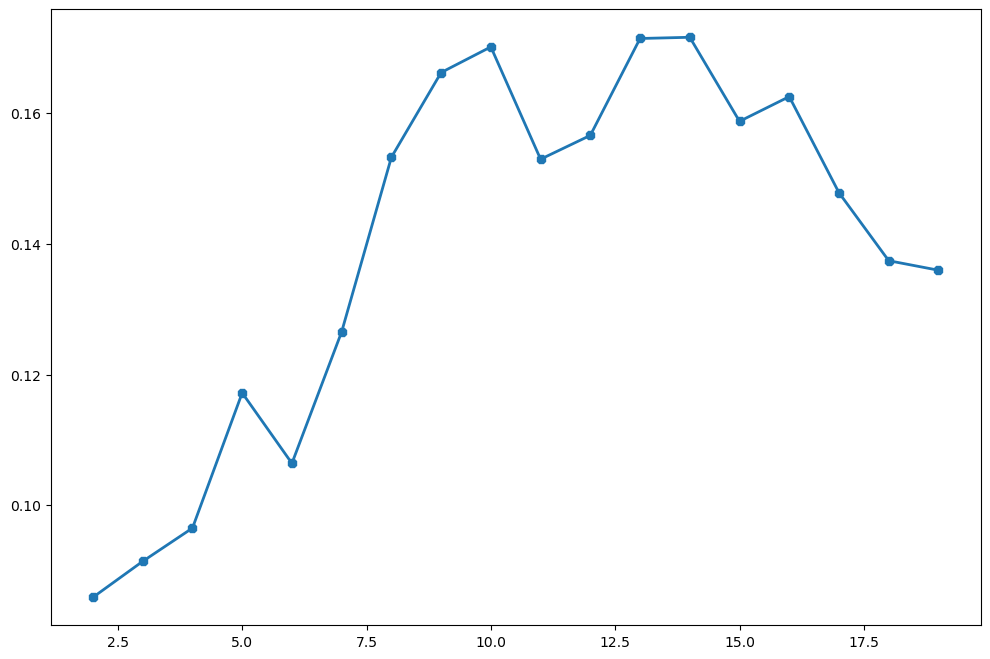

In [8]:
scaler = StandardScaler()

X1_scaled = scaler.fit_transform(X1)

wcss_scaled = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state= 42)
    kmeans.fit(X1_scaled)
    wcss_scaled.append(kmeans.inertia_)

plt.figure(figsize = (12, 8))

plt.plot(range(1, 20), wcss_scaled, linewidth = 2, marker = '8')
plt.title('Elbow Plot]]')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

s_scaled = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state= 42)
    predictions = kmeans.fit_predict(X1_scaled)
    s_scaled.append(metrics.silhouette_score(X1_scaled, predictions))

plt.figure(figsize = (12, 8))

plt.plot(range(2, 20), s_scaled, linewidth = 2, marker = '8')
plt.show()

After reviewing the new elbow and silhouette plots, I will go with 10 as the new k.

In [9]:
kmeans_scaled = KMeans(n_clusters=10, init="k-means++",n_init=50, random_state =42)
kmeans_scaled.fit(X1_scaled)

KMeans(n_clusters=10, n_init=50, random_state=42)

In [10]:
labels = kmeans_scaled.fit_predict(X1_scaled)
labels

array([4, 0, 9, ..., 3, 3, 3], dtype=int32)

In [11]:
kmeans_scaled.cluster_centers_

array([[-0.25705595, -0.06342677, -0.42974707,  1.81081454, -0.22647363,
        -0.05142666, -0.16925055, -0.17237418,  0.05620144, -0.40941109,
        -0.25791113, -0.03234681,  0.0818499 , -0.13116778, -0.3603039 ,
        -0.1076821 ,  0.07213915],
       [-0.14914858,  0.06433584, -0.08656434, -0.08200632, -0.08801523,
        -0.01275796,  4.32114042, -0.09403928, -0.27524355, -0.08933706,
        -0.05160159, -0.11501434, -0.28181335, -0.09797516, -0.11939766,
        -0.10298118,  0.29910222],
       [-0.09119869,  0.1933402 , -0.38975475, -0.3536807 , -0.1381105 ,
         0.06370787, -0.04150954, -0.17460185,  0.00868728, -0.30457859,
        -0.23687293, -0.10330758, -0.1992179 , -0.1682991 , -0.34972263,
         4.71507357,  0.12302637],
       [ 1.04946732, -0.0088227 , -0.35944132, -0.46039198, -0.27820774,
         0.22245007, -0.1097986 , -0.32899186, -0.07290083,  2.01927342,
        -0.30562692,  0.25343154, -0.23370301, -0.20345865, -0.57485846,
        -0.19055741

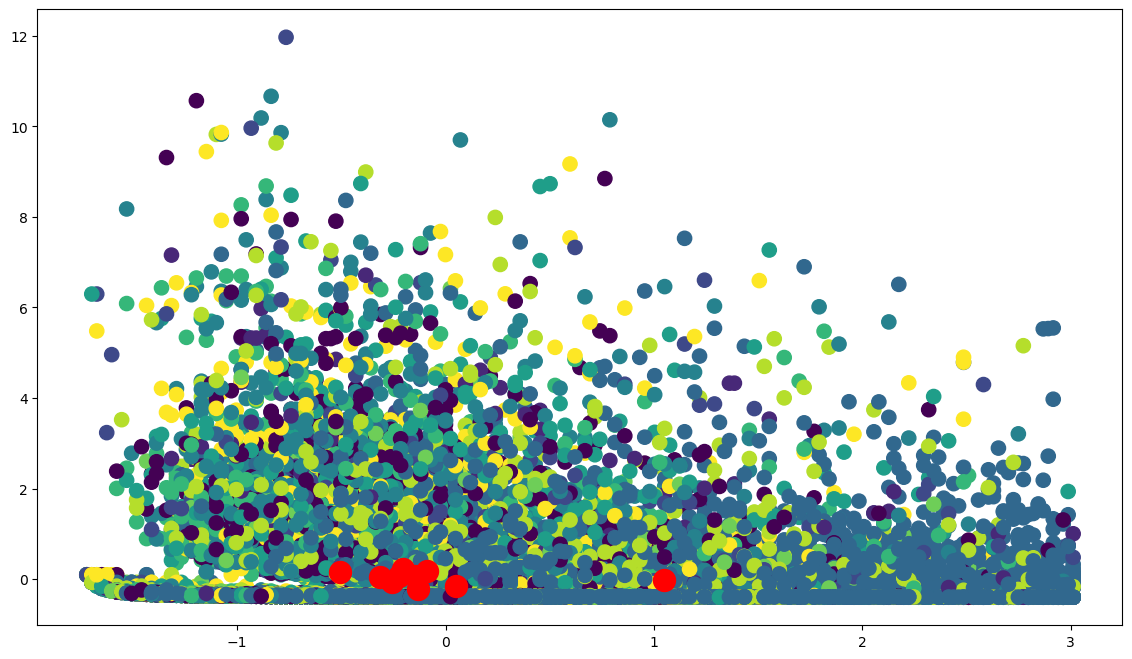

In [12]:
plt.figure(figsize = (14, 8))

plt.scatter(X1_scaled[:, 0], X1_scaled[:, 1], c = kmeans_scaled.labels_, s = 105)
plt.scatter(kmeans_scaled.cluster_centers_[:, 0], kmeans_scaled.cluster_centers_[:, 1], color = 'red', s = 250)
plt.show()

The clusters appear to be spreading out and it looks very disorganized with data points going further apart from each other.

# K-Means Clustering with PCA

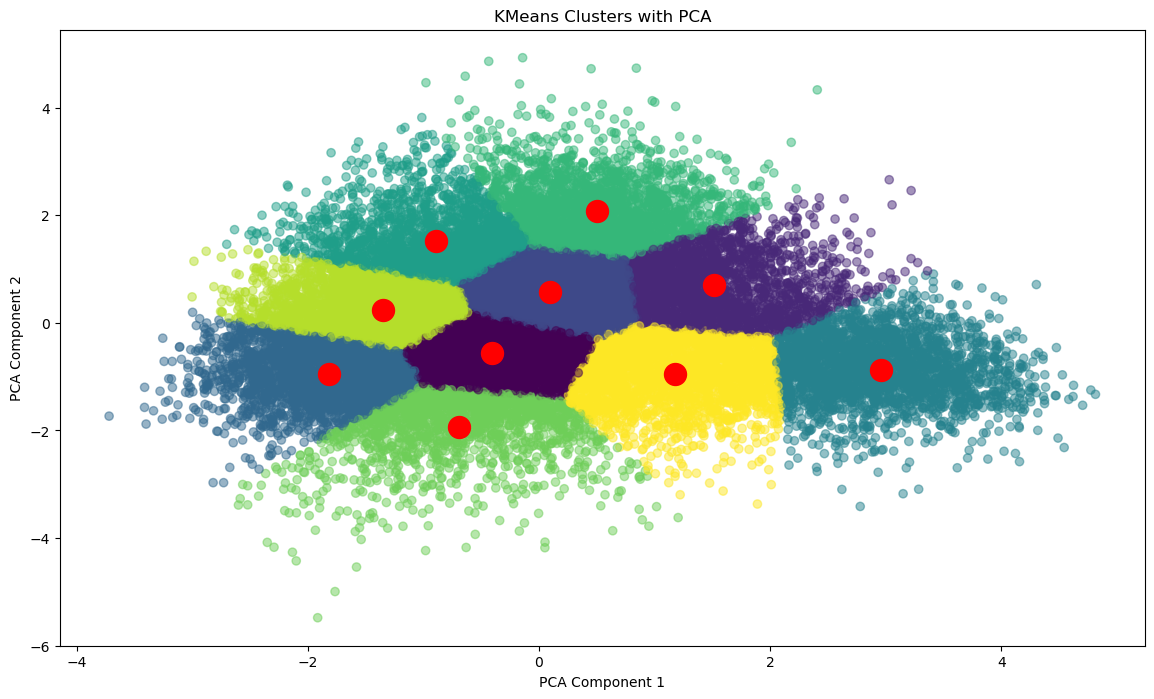

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X1_scaled)

clusters = kmeans_scaled.fit_predict(X_pca)

plt.figure(figsize=(14, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = clusters, cmap= "viridis", alpha = 0.5)
plt.scatter(kmeans_scaled.cluster_centers_[:,0], kmeans_scaled.cluster_centers_[:,1], color="red", s=250)
plt.title('KMeans Clusters with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [14]:
test_df = pd.read_csv('/Users/sa22/Documents/code/Music_recommedation_algorithm/data/raw/recommend.csv')
test_df.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,obscene,music,movement/places,light/visual perceptions,family/spiritual,like/girls,sadness,feelings,topic,age
0,76885,godsmack,immune,1998,rock,come world society futher place home land deat...,74,0.000907,0.348191,0.375448,...,0.000907,0.019389,0.000907,0.000907,0.000907,0.000907,0.000907,0.018854,world/life,0.314286
1,65394,dennis brown,second chance,1993,reggae,maybe maybe treat good feel second best girl s...,43,0.001224,0.029943,0.001224,...,0.001224,0.001224,0.001224,0.001224,0.001224,0.056842,0.001224,0.062092,night/time,0.385714
2,10980,the black crowes,sister luck,1990,pop,worry sick eye hurt rest head life outside gir...,54,0.001120,0.482490,0.001120,...,0.001120,0.001120,0.001120,0.078222,0.001120,0.051132,0.031571,0.202862,violence,0.428571
3,842,jerry lee lewis,your cheating heart,1960,pop,cheat heart weep sleep sleep come night cheat ...,25,0.204740,0.002506,0.002506,...,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,sadness,0.857143
4,2764,paul anka,eso beso,1966,pop,beso kiss beso kiss know samba bossanova close...,97,0.001170,0.001170,0.001170,...,0.001170,0.001170,0.001170,0.314626,0.001170,0.053731,0.001170,0.001170,romantic,0.771429


In [15]:
kmeans_orig = KMeans(n_clusters=10, random_state=42)
labels = kmeans_orig.fit_predict(X1_scaled)  # X1_scaled has shape (n_samples, 17)

#  build the DataFrame correctly
feature_names = ['len', 'dating', 'violence', 'world/life', 'night/time',
                 'shake the audience', 'family/gospel', 'romantic', 'communication',
                 'obscene', 'music', 'movement/places', 'light/visual perceptions',
                 'family/spiritual', 'sadness', 'feelings', 'age']

clusters = pd.DataFrame(kmeans_orig.cluster_centers_.T,  # shape (17, 10)
                        columns=[f'Cluster_{i}' for i in range(10)],
                        index=feature_names)

In [16]:
top_features = clusters.apply(lambda x: x.abs().nlargest(4).index.tolist(), axis=0)
top_features_df = pd.DataFrame(top_features).T
top_features_df.columns = ['Top 1', 'Top 2', 'Top 3', 'Top 4']

print(top_features_df)

                        Top 1                     Top 2            Top 3  \
Cluster_0          world/life                  violence          obscene   
Cluster_1             obscene                       len          sadness   
Cluster_2     movement/places             communication         romantic   
Cluster_3          night/time                  violence       world/life   
Cluster_4               music                  violence              age   
Cluster_5            romantic                       age              len   
Cluster_6            violence                   sadness          obscene   
Cluster_7              dating                  violence  movement/places   
Cluster_8  shake the audience  light/visual perceptions    communication   
Cluster_9             sadness                  violence          obscene   

                Top 4  
Cluster_0     sadness  
Cluster_1         age  
Cluster_2     sadness  
Cluster_3     sadness  
Cluster_4  world/life  
Cluster_5    violen

In [17]:
cleaned_df = pd.DataFrame(X1_scaled, columns=feature_names)
cleaned_df['Cluster'] = labels

cluster_names = {
    0: 'world/life_violence_obscene_sadness',
    1: 'obscene_len_sadness_age',
    2: 'movement/places_communication_romantic_sadness',
    3: 'night/time_violence_world/life_sadness',
    4: 'music_violence_age_world/life',
    5: 'romantic_age_len_violence',
    6: 'violence_sadness_obscene_world/life',
    7: 'dating_violence_movement/places_feelings',
    8: 'shake the audience_light/visual perceptions_communication_sadness',
    9: 'sadness_violence_obscene_world/life',
}
# Map cluster numbers to names
cleaned_df['Cluster Name'] = cleaned_df['Cluster'].map(cluster_names)

# Load metadata (columns that exist in your raw data)
df2 = pd.read_csv("/Users/sa22/Documents/code/Music_recommedation_algorithm/data/raw/train.csv")
label = df2[['genre', 'artist_name', 'track_name', 'release_date']]

# Combine metadata and model results
output_df = pd.concat([label.reset_index(drop=True), cleaned_df.reset_index(drop=True)], axis=1)

# Reorder columns to put Cluster and Cluster Name first
ordered_cols = ['Cluster', 'Cluster Name'] + [col for col in output_df.columns if col not in ['Cluster', 'Cluster Name']]
output_df = output_df[ordered_cols]

# Sort by cluster number
output_df = output_df.sort_values(by='Cluster').reset_index(drop=True)

# Preview result
output_df.head()

,Cluster,Cluster Name,genre,artist_name,track_name,release_date,len,dating,violence,world/life,...,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
0,0,world/life_violence_obscene_sadness,blues,blues saraceno,mercy train,2014,-1.028679,-0.364466,-0.651238,1.152947,...,0.205343,-0.681552,-0.524850,-0.470574,-0.495784,-0.524658,-0.433669,-0.703174,-0.404314,-1.285269
1,0,world/life_violence_obscene_sadness,rock,pantera,the art of shredding,1990,-0.741809,-0.361244,0.152038,2.180900,...,-0.438232,-0.680011,-0.523919,-0.469207,-0.493942,-0.522774,4.686746,-0.702243,-0.401960,0.012963
2,0,world/life_violence_obscene_sadness,blues,z.z. hill,when can we do this again,1981,-0.048542,-0.387660,-0.658036,1.444084,...,-0.251118,0.647123,-0.531549,-0.480421,-0.509050,1.076365,-0.457469,-0.709879,-0.421265,0.499801
3,0,world/life_violence_obscene_sadness,rock,megadeth,dawn patrol,1990,-0.956962,-0.319366,0.737984,1.269808,...,-0.417557,-0.659983,-0.511824,-0.451427,-0.469990,2.520002,-0.387389,-0.690137,-0.371355,0.012963
4,0,world/life_violence_obscene_sadness,pop,natalie merchant,beloved wife,1995,-0.431034,-0.375958,-0.654606,2.845265,...,-0.445497,-0.687048,-0.528169,-0.475453,-0.502358,-0.531378,-0.445462,-0.330690,1.104755,-0.257502


In [18]:
# Filter songs that belong to Cluster 
cluster_1_songs = output_df[output_df['Cluster'] == 1]


# Show the first 5 songs from Cluster 1
cluster_1_songs.head()

cluster_1_songs[['Cluster','Cluster Name','genre', 'artist_name', 'track_name', 'release_date']].head()

,Cluster,Cluster Name,genre,artist_name,track_name,release_date
4609,1,obscene_len_sadness_age,reggae,kofi,didn't i,1989
4610,1,obscene_len_sadness_age,reggae,the twinkle brothers,total disaster,1989
4611,1,obscene_len_sadness_age,pop,nicki minaj,megatron,2019
4612,1,obscene_len_sadness_age,rock,frankie laine,i feel like my time ain't long,1956
4613,1,obscene_len_sadness_age,rock,limp bizkit,livin' it up,2000


In [19]:
output_df.to_csv("/Users/sa22/Documents/code/Music_recommedation_algorithm/data/processed/clustered_songs.csv", index=False)

# New Sample Prediction

In [20]:
feature_names = ['len', 'dating', 'violence', 'world/life', 'night/time',
                 'shake the audience', 'family/gospel', 'romantic', 'communication',
                 'obscene', 'music', 'movement/places', 'light/visual perceptions',
                 'family/spiritual', 'sadness', 'feelings', 'age']

X_new = test_df[feature_names]

In [21]:
X_new_scaled = scaler.transform(X_new)

/opt/anaconda3/envs/ds/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [22]:
new_labels = kmeans_orig.predict(X_new_scaled)

In [23]:
new_predictions = pd.DataFrame(X_new_scaled, columns=feature_names)
new_predictions['Cluster'] = new_labels

In [24]:
cluster_names = {
    'Cluster_0': 'world/life_violence_obscene_sadness',
    'Cluster_1': 'obscene_len_sadness_age',
    'Cluster_2': 'movement/places_communication_romantic_sadness',
    'Cluster_3': 'night/time_violence_world/life_sadness',
    'Cluster_4': 'music_violence_age_world/life',
    'Cluster_5': 'romantic_age_len_violence',
    'Cluster_6': 'violence_sadness_obscene_world/life',
    'Cluster_7': 'dating_violence_movement/places_feelings',
    'Cluster_8': 'shake the audience_light/visual perceptions_communication_sadness',
    'Cluster_9': 'sadness_violence_obscene_world/life',
}

new_predictions['Cluster Name'] = new_predictions['Cluster'].map(cluster_names)
metadata = test_df[['artist_name', 'track_name']].reset_index(drop=True)

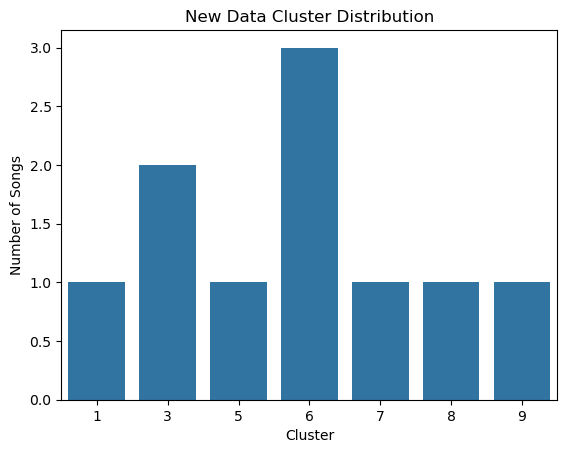

In [25]:
sns.countplot(data=new_predictions, x='Cluster')
plt.title("New Data Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Number of Songs")
plt.show()

In [26]:
new_predictions['Cluster Name'] = new_predictions['Cluster'].map(cluster_names)
# Move Cluster and Cluster Name to the front
cols = ['Cluster', 'Cluster Name'] + [col for col in new_predictions.columns if col not in ['Cluster', 'Cluster Name']]
new_predictions = new_predictions[cols]
new_predictions = pd.concat([metadata, new_predictions.reset_index(drop=True)], axis=1)

# Sort by cluster
new_predictions = new_predictions.sort_values(by='Cluster').reset_index(drop=True)

# Preview of all songs
new_predictions.head(11)

,artist_name,track_name,Cluster,Cluster Name,len,dating,violence,world/life,night/time,shake the audience,...,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
0,rage against the machine,pistol grip pump,1,NaN,1.887828,-0.390237,-0.658791,0.075839,2.113359,-0.411827,...,-0.336437,-0.097159,2.001860,-0.481515,-0.510524,-0.539728,0.001211,-0.710624,-0.423148,-0.527967
1,dennis brown,second chance,3,NaN,-0.717904,-0.379749,-0.494964,-0.695418,2.228376,-0.398319,...,0.197620,3.196671,-0.529264,-0.477063,-0.504525,-0.533595,-0.449351,-0.707592,0.433986,-0.149316
2,randy travis,messin' with my mind,3,NaN,-0.765715,-0.374406,-0.654151,0.064830,3.887365,-0.391437,...,-0.444730,2.235623,-0.527721,-0.474794,-0.501470,-0.530471,-0.443869,-0.706048,-0.411579,0.229336
3,paul anka,eso beso,5,NaN,0.573009,-0.380788,-0.656022,-0.695734,-0.063159,-0.399657,...,4.645790,-0.689358,-0.529564,-0.477504,-0.505120,2.966110,-0.450417,-0.707893,-0.416242,1.311196
4,the black crowes,sister luck,6,NaN,-0.454940,-0.381738,2.038110,-0.696023,-0.502602,-0.400881,...,-0.448350,-0.689812,-0.529838,-0.477907,-0.505663,0.326225,-0.451392,-0.540063,2.398551,0.012963
5,noro morales,silencio,6,NaN,-0.383223,-0.375204,2.068756,0.113678,-0.499544,-0.392465,...,-0.445124,1.480261,-0.527951,-0.475133,-0.501926,-0.530937,1.047899,-0.706279,0.050937,2.068499
6,paramore,playing god,6,NaN,0.429574,-0.389541,2.380488,-0.036508,0.365806,-0.066362,...,-0.452202,-0.010288,-0.532092,-0.481220,-0.510126,-0.539321,-0.459399,-0.058052,-0.222840,-1.014804
7,jerry lee lewis,your cheating heart,7,NaN,-1.148208,3.506697,-0.648540,-0.687972,0.647622,-0.366780,...,-0.435279,-0.677150,-0.522192,-0.466667,-0.490520,-0.519276,-0.424224,1.905675,-0.397588,1.635754
8,godsmack,immune,8,NaN,0.023176,-0.385794,1.286387,1.477614,-0.504500,5.115865,...,-0.450352,-0.691752,-0.531010,-0.329793,-0.507983,-0.537130,-0.455554,-0.709340,-0.169436,-0.419781
9,taste,railway and gun,9,NaN,-0.861338,0.587487,-0.653362,-0.692975,0.239180,0.490014,...,-0.443401,3.506233,-0.526943,-0.473652,-0.499930,-0.528896,-0.441106,1.022338,-0.409611,1.094824
